#                  Projet n°2 : Natural Language Processing with Disaster Tweets

### Introduction

Le traitement du langage naturel, également connu sous le nom de NLP, est un sous-domaine de l'informatique, en particulier de l'intelligence artificielle, qui se concentre sur la compréhension de textes écrits et parlés. Il couvre diverses tâches dont certaines sont la reconnaissance vocale, l'analyse des sentiments et la génération du langage ; Et, il a été appliqué dans plusieurs cas d'utilisation tels que la traduction automatique, la détection de spam, les assistants virtuels et les chatbots.     

Le projet couvert dans cet article est un projet d'analyse des sentiments appelé Natural Language Processing with Disaster Tweets . L'analyse des sentiments est le processus permettant d'extraire des qualités subjectives d'un texte telles que l'émotion ou l'attitude. L'objectif du projet est d'identifier si un tweet spécifique est un véritable désastre ou non. Le projet est idéal pour les débutants en PNL. Cet article met en évidence les étapes pour atteindre une précision de 80 % sur ce projet, et se concentre sur les étapes de prétraitement et de construction du modèle.

### A propos du  Notebook :

Ce notebook est divisé en 4 sections suivantes :                  
__Exploration des données__ : nous allons explorer les données à l'aide de divers graphiques de visualisation pour avoir un aperçu de nos données.            
__Nettoyage et remplissage des données manquantes__ : nous allons nettoyer les données et supprimer le bruit dans les données.    
__Se préparer__ : nous allons transformer les données dans un format approprié pour la prédiction.     
__L'étape finale__ : nous allons implémenter divers modèles ML pour classer les données textuelles.

### Importation de bibliothèques

In [2]:
# pour la manipulation et l'analyse des données
import pandas as pd
import numpy as np
# pour la visualisation des données
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-bright')
# pour la PNL
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
# pour les algorithmes ML/Deep Learning
from tensorflow.keras.layers import Embedding,Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM,Bidirectional,GRU,MaxPooling1D,Conv1D
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

C:\Users\Wijdane\AppData\Local\Temp\ipykernel_12960\3728449027.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-bright')


# **1 Exploration des données** 

La cellule ci-dessous utilise la bibliothèque pandas pour charger les données d'entraînement et de test dans les variables "train" et "test". 

Pandas est une bibliothèque puissante qui permet l'importation, la manipulation et l'analyse de données tabulaires. Il prend en charge une large gamme de formats de fichiers tels que CSV, Excel, SQL, etc.

In [3]:
# Lecture de données à partir de csv
train = pd.read_csv("C:\\Users\\Wijdane\\Desktop\\IA1\\tweet disaster\\train.csv")
test  = pd.read_csv("C:\\Users\\Wijdane\\Desktop\\IA1\\tweet disaster\\test.csv")
target = pd.read_csv("C:\\Users\\Wijdane\\Desktop\\IA1\\tweet disaster\\sample_submission.csv")

In [4]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [6]:
target.head()

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


__Explorons les colonnes de l'ensemble de données__           
__id__ : un identifiant unique de chaque tweet        
__keyword__ : un mot-clé particulier du tweet (cela peut être vide)         
__location__ : l'emplacement d'où le tweet a été envoyé (cela peut être vide)         
__text__ : le texte du tweet          
__target__ : présent uniquement dans les données du train, et indique si le tweet concerne une véritable catastrophe (1) ou non (0)

In [7]:
# Affichage des lignes et des colonnes dans l'ensemble de données
print("Il y a {} lignes et {} colonnes  dans les données d'apprentissage".format(train.shape[0],train.shape[1]))
print("Il y a {} lignes et {} colonnes  dans les données d'apprentissage".format(test.shape[0],test.shape[1]))

Il y a 7613 lignes et 5 colonnes  dans les données d'apprentissage
Il y a 3263 lignes et 4 colonnes  dans les données d'apprentissage


In [8]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


Le DataFrame contient 7613 entrées, allant de l'indice 0 à l'indice 7612.
Il comporte cinq colonnes au total.
La colonne "id" contient des valeurs entières et ne comporte aucune valeur manquante.      
La colonne "keyword" contient des objets (chaînes de caractères) et comporte 7552 valeurs non nulles.      
La colonne "location" contient des objets et comporte 5080 valeurs non nulles.         
La colonne "text" contient des objets et ne comporte aucune valeur manquante.        
La colonne "target" contient des valeurs entières et ne comporte aucune valeur manquante.     

In [9]:
#Disaster Tweet
train[train['target']==1]

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [10]:
#Non-Disaster Tweet
train[train['target']==0]

,id,keyword,location,text,target
15,23,NaN,NaN,What's up man?,0
16,24,NaN,NaN,I love fruits,0
17,25,NaN,NaN,Summer is lovely,0
18,26,NaN,NaN,My car is so fast,0
19,28,NaN,NaN,What a goooooooaaaaaal!!!!!!,0
...,...,...,...,...,...
7581,10833,wrecked,Lincoln,@engineshed Great atmosphere at the British Li...,0
7582,10834,wrecked,NaN,Cramer: Iger's 3 words that wrecked Disney's s...,0
7584,10837,NaN,NaN,These boxes are ready to explode! Exploding Ki...,0
7587,10841,NaN,NaN,Sirens everywhere!,0


<Axes: xlabel='location'>

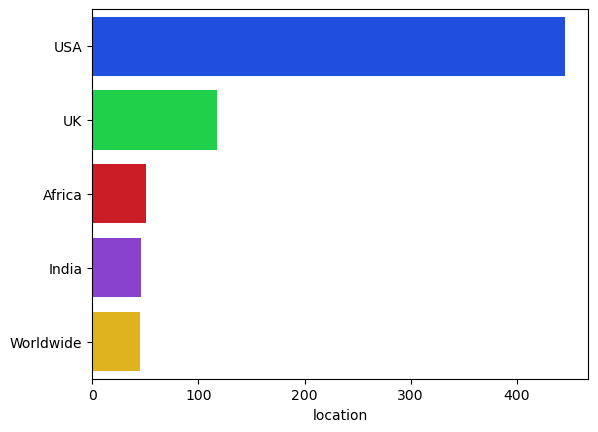

In [11]:
# Remplacer le nom ambigu des emplacements par des noms standard
train['location'].replace({'United States':'USA',
                           'New York':'USA',
                            "London":'UK',
                            "Los Angeles, CA":'USA',
                            "Washington, D.C.":'USA',
                            "California":'USA',
                             "Chicago, IL":'USA',
                             "Chicago":'USA',
                            "New York, NY":'USA',
                            "California, USA":'USA',
                            "FLorida":'USA',
                            "Nigeria":'Africa',
                            "Kenya":'Africa',
                            "Everywhere":'Worldwide',
                            "San Francisco":'USA',
                            "Florida":'USA',
                            "United Kingdom":'UK',
                            "Los Angeles":'USA',
                            "Toronto":'Canada',
                            "San Francisco, CA":'USA',
                            "NYC":'USA',
                            "Seattle":'USA',
                            "Earth":'Worldwide',
                            "Ireland":'UK',
                            "London, England":'UK',
                            "New York City":'USA',
                            "Texas":'USA',
                            "London, UK":'UK',
                            "Atlanta, GA":'USA',
                            "Mumbai":"India"},inplace=True)

sns.barplot(y=train['location'].value_counts()[:5].index,x=train['location'].value_counts()[:5],
            orient='h')

__Explorons la variable cible__


Text(0.5, 1.0, 'Countplot for Disaster and Non-disaster Related Tweets')

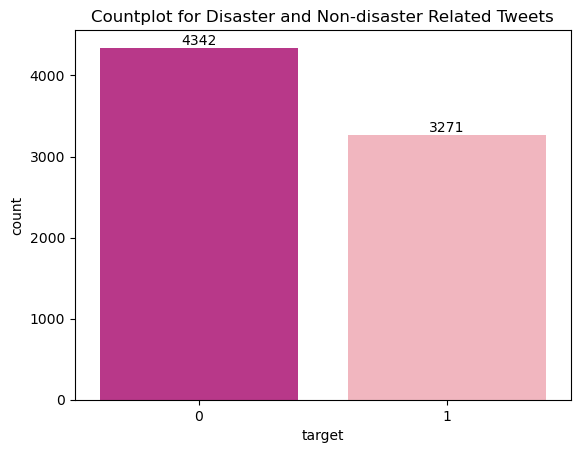

In [12]:
ax = sns.countplot(data=train, x='target', palette='RdPu_r')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Countplot for Disaster and Non-disaster Related Tweets')

Selon le Countplot, nous pouvons constater qu'il y a environ 3200 échantillons dans la classe cible 1, tandis qu'il y a environ 4500 échantillons dans la classe cible 0. De plus, les classes semblent être relativement équilibrées.

__Commençons par analyser le nombre total de caractères dans le texte.__

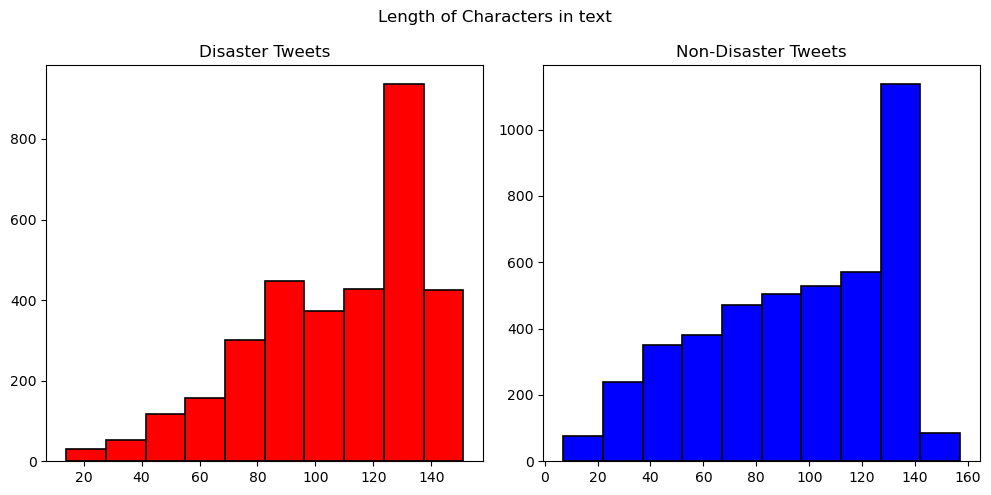

In [13]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
char_len_dis = train[train['target']==1]['text'].str.len()
ax1.hist(char_len_dis,color='red',edgecolor='black', linewidth=1.2)
ax1.set_title('Disaster Tweets')
char_len_ndis = train[train['target']==0]['text'].str.len()
ax2.hist(char_len_ndis,color='blue',edgecolor='black', linewidth=1.2)
ax2.set_title('Non-Disaster Tweets')
plt.suptitle("Length of Characters in text")
plt.tight_layout()
plt.show()


D'après les histogrammes présentés ci-dessus, on peut observer que la distribution du nombre de caractères pour les tweets, qu'ils soient liés à des catastrophes ou non, est principalement concentrée dans une plage d'environ 120 à 140 caractères. Cela signifie que la majorité des tweets, dans les deux catégories, ont une longueur de texte comprise dans cette plage.

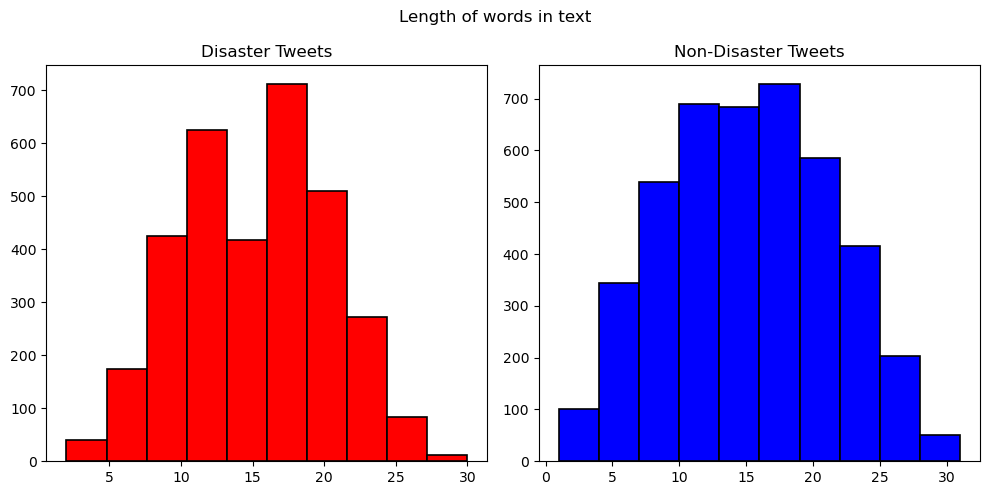

In [14]:
# Analyse du nombre de mots dans le texte.
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
char_len_dis = train[train['target']==1]['text'].str.split().map(lambda x: len(x))
ax1.hist(char_len_dis,color='red',edgecolor='black', linewidth=1.2)
ax1.set_title('Disaster Tweets')
char_len_ndis = train[train['target']==0]['text'].str.split().map(lambda x: len(x))
ax2.hist(char_len_ndis,color='blue',edgecolor='black', linewidth=1.2)
ax2.set_title('Non-Disaster Tweets')
plt.suptitle("Length of words in text")
plt.tight_layout()
plt.show()

D'après les histogrammes mentionnés, il est observé que le nombre de mots utilisés dans les tweets liés à des catastrophes et dans les tweets non liés à des catastrophes est d'environ 15 à 20 mots.

Cela signifie que, en moyenne, les tweets dans les deux catégories (catastrophiques et non catastrophiques) ont une longueur de texte similaire, avec un nombre de mots compris entre 15 et 20.

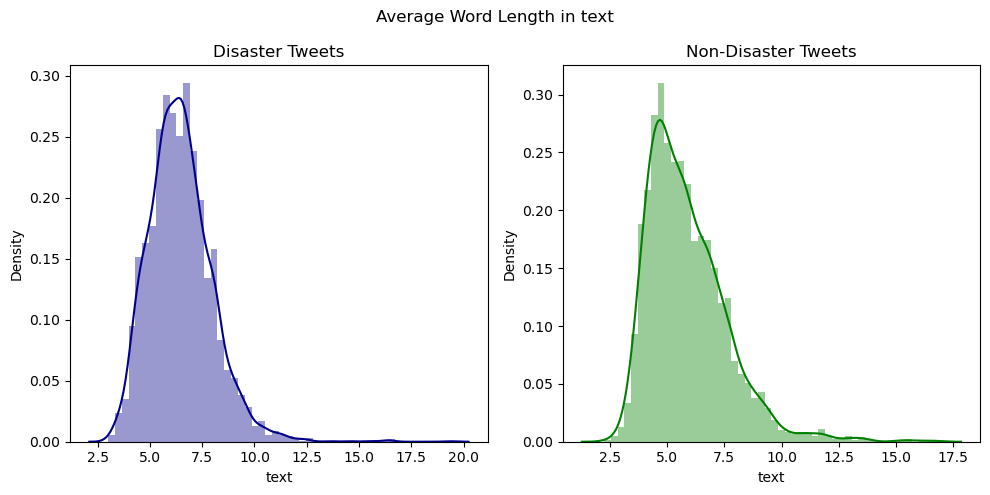

In [15]:
# Analyse de la longueur moyenne des mots dans le texte.
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
char_len_dis = train[train['target']==1]['text'].str.split().apply(lambda x: [len(i) for i in x])
sns.distplot(char_len_dis.map(lambda x: np.mean(x)),ax=ax1,color='darkblue')
ax1.set_title('Disaster Tweets')
char_len_ndis = train[train['target']==0]['text'].str.split().apply(lambda x: [len(i) for i in x])
sns.distplot(char_len_ndis.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('Non-Disaster Tweets')
plt.suptitle("Average Word Length in text")
plt.tight_layout()
plt.show()

d'après les distributions des nombres de mots dans les tweets, on peut constater que les tweets liés aux catastrophes ont en moyenne un nombre de mots compris entre 7 et 7,5, tandis que les tweets non liés aux catastrophes ont en moyenne un nombre de mots compris entre 4,5 et 5.

Cela signifie que, en général, les tweets sur des événements catastrophiques semblent contenir plus de mots que les tweets qui ne sont pas liés à des catastrophes. La différence de nombre de mots moyen peut indiquer que les utilisateurs ont tendance à fournir plus d'informations, de détails ou de contexte lorsqu'ils tweetent sur des événements catastrophiques par rapport à d'autres sujets.

__Explorons les données plus en profondeur :__

Les sections ci-dessous effectuent l'analyse suivante :    
__Analyse des mots vides__       
__Analyse des ponctuations__         
__Analyse des mots manquants.__        

In [16]:
# Création d'un corpus d'échantillons pour une analyse plus approfondie.
def create_corpus(target):
    corpus = []
    for x in train[train['target']==target]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

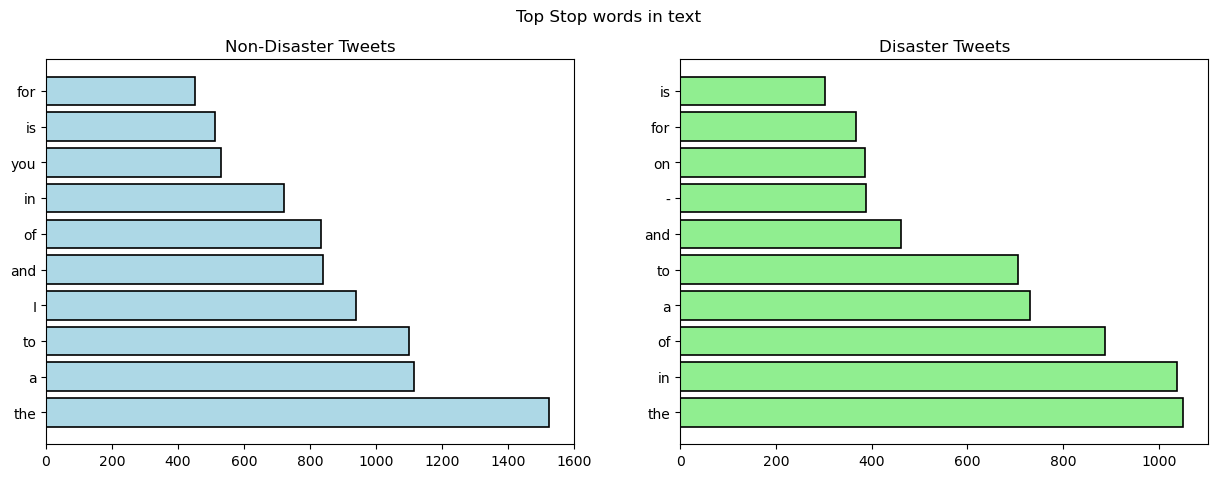

In [17]:
# Analyse des principaux stop words dans le texte.
from collections import defaultdict

def analyze_stopwords(data,func,target):
    values_list = []
    for labels in range(0,len(target)):
        dic = defaultdict(int)
        corpus = func(target[labels])
        for word in corpus:
            dic[word]+=1
        top = sorted(dic.items(),key = lambda x: x[1],reverse=True)[:10]
        x_items,y_values = zip(*top)
        values_list.append(x_items)
        values_list.append(y_values)
    
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
    ax1.barh(values_list[0],values_list[1],color="lightblue",edgecolor='black', linewidth=1.2)
    ax1.set_title("Non-Disaster Tweets")
    ax2.barh(values_list[2],values_list[3],color="lightgreen",edgecolor='black', linewidth=1.2)
    ax2.set_title("Disaster Tweets")
            
    plt.suptitle("Top Stop words in text")
    plt.show()

analyze_stopwords(train,create_corpus,[0,1])

Les graphiques à barres ci-dessus affichent les 10 premiers mots vides dans les tweets. D'après le graphique à barres, on observe que le mot vide le plus fréquent dans les tweets en cas de catastrophe/non-catastrophe est "the" (1000+) tandis que le moins se produisant pour les non-catastrophes est "for" (400) et pour les tweets en cas de catastrophe est "is" (300).

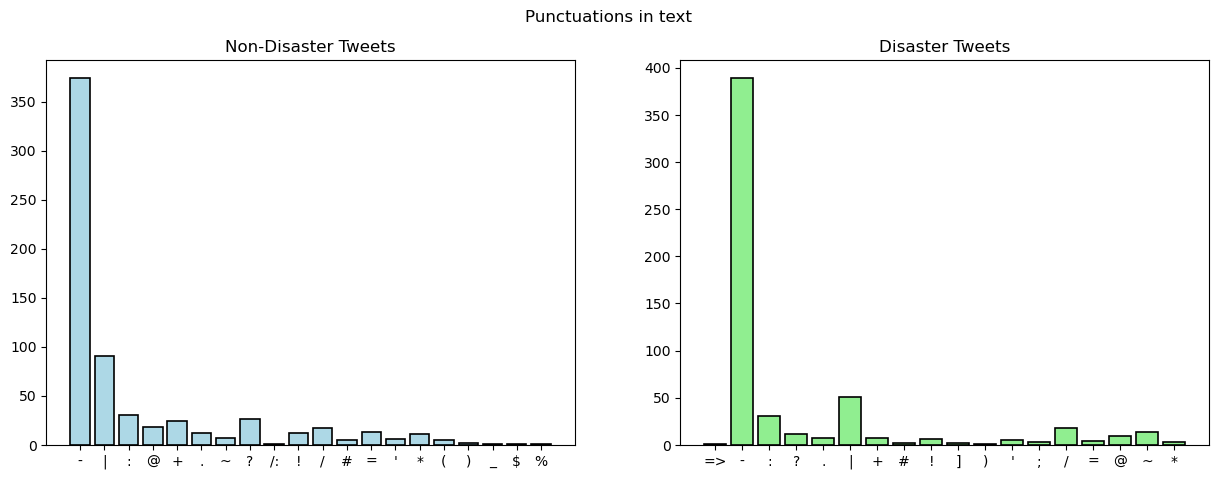

In [18]:
# Analyser les ponctuations
import string

def analyze_punctuation(data,func,target):
    values_list = []
    special = string.punctuation
    for labels in range(0,len(target)):
        dic = defaultdict(int)
        corpus = func(target[labels])
        for i in corpus:
            if i in special:
                dic[i]+=1
        x_items,y_values = zip(*dic.items())
        values_list.append(x_items)
        values_list.append(y_values)
    
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
    ax1.bar(values_list[0],values_list[1],color="lightblue",edgecolor='black', linewidth=1.2)
    ax1.set_title("Non-Disaster Tweets")
    ax2.bar(values_list[2],values_list[3],color="lightgreen",edgecolor='black', linewidth=1.2)
    ax2.set_title("Disaster Tweets")
            
    plt.suptitle("Punctuations in text")
    plt.show()

analyze_punctuation(train,create_corpus,[0,1])

Les graphiques à barres ci-dessus affichent les 10 meilleures ponctuations dans les tweets. D'après le graphique à barres, on observe que la ponctuation la plus fréquente dans les tweets en cas de catastrophe/non-catastrophe est "-" (350+) tandis que la moins fréquente pour les tweets non-catastrophe est "%","/:","$" ,"_" et pour les tweets catastrophe est "=>", ")".

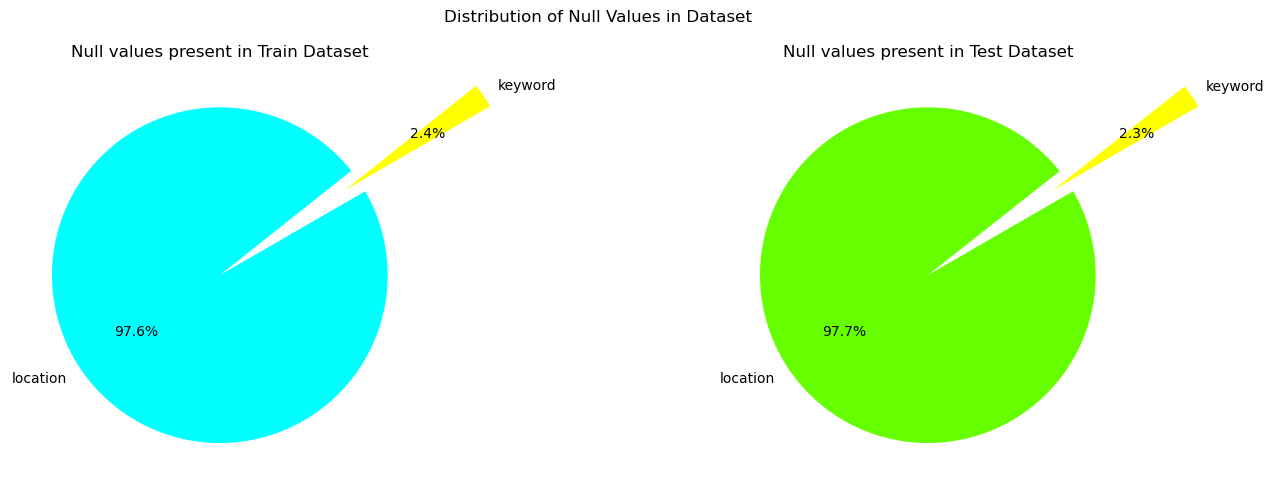

In [19]:
# Vérification des valeurs nulles
missing_train = train.isnull().sum()  
missing_test = test.isnull().sum()  
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
missing_train = missing_train[missing_train>0].sort_values()
ax1.pie(missing_train,autopct='%1.1f%%',startangle=30,explode=[0.9,0],labels=["keyword","location"],colors=['yellow','cyan'])
ax1.set_title("Null values present in Train Dataset")

missing_test = missing_test[missing_test>0].sort_values()
ax2.pie(missing_test,autopct='%1.1f%%',startangle=30,explode=[0.9,0],labels=["keyword","location"],colors=['yellow','#66ff00'])
ax2.set_title("Null values present in Test Dataset")
plt.suptitle("Distribution of Null Values in Dataset")
plt.tight_layout()
plt.show()

La représentation  ci-dessus affiche les valeurs manquantes dans l'ensemble de données. A partir de la distribution, on observe que les colonnes Keyword et Location contiennent des valeurs manquantes. Pour les données d'apprentissage, le % de valeurs manquantes est de 97,6 pour "localisation" et 24 pour "mots clés" tandis que pour les données de test, il est de 97,7% pour "localisation" et 23% pour les mots clés. De plus, la colonne ayant le maximum de valeurs manquantes est : l'emplacement tandis que la colonne Mots-clés a le nombre minimum de valeurs manquantes pour les deux ensembles de données.

__Analysons la colonne des mots clés__

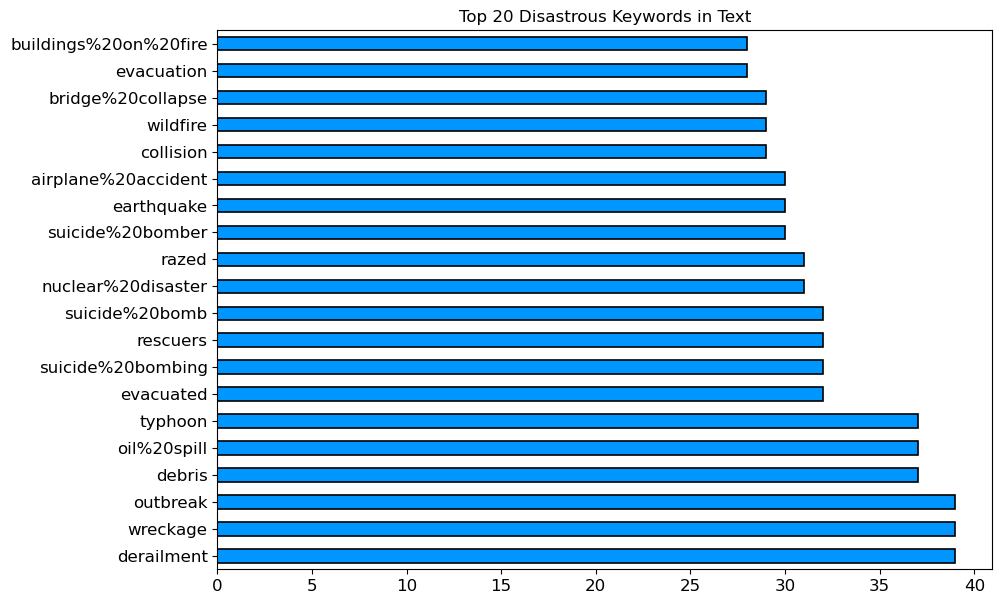

In [20]:
# Analysing Top 20  disastrous KeyWords in text .
plt.figure(figsize=(10,7))
train[train['target']==1]['keyword'].value_counts()[:20].plot(kind='barh', fontsize=12,title='Top 20 Disastrous Keywords in Text', color='#0096FF',edgecolor='black', linewidth=1.2)
plt.show()

Le graphique à barres ci-dessus représente les 20 principaux mots-clés désastreux dans le texte. D'après le graphique à barres, on observe que les mots clés les plus fréquents sont déraillement, épave, épidémie (35+) tandis que les moins fréquents sont tempête de sable et évacuation (28).

__Analysons la colonne Emplacements :__

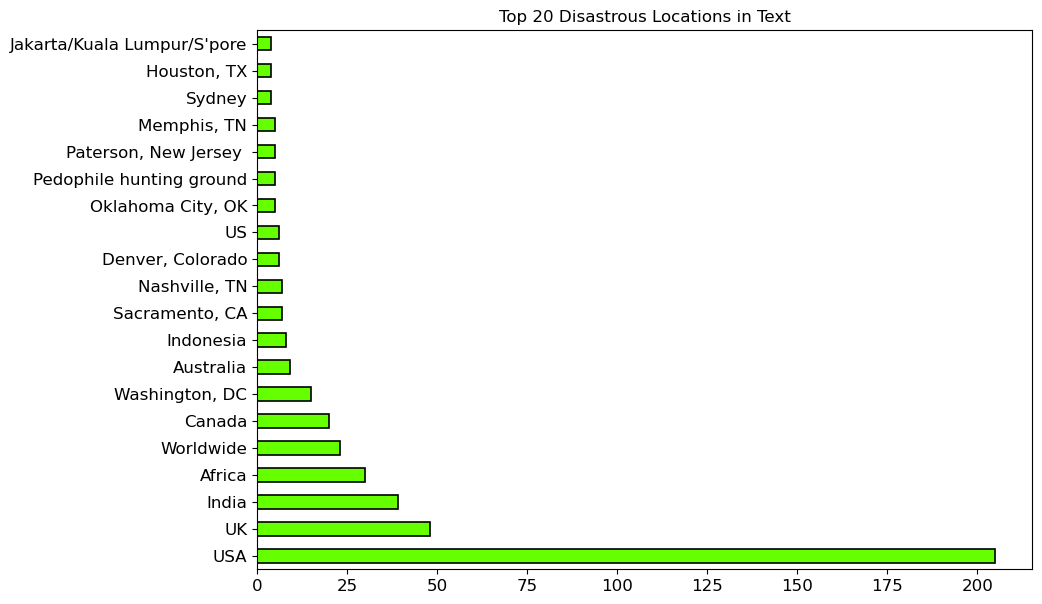

In [21]:
# Analyser les 20 meilleurs emplacements désastreux dans le texte.
plt.figure(figsize=(10,7))
train[train["target"]==1]["location"].value_counts()[:20].plot(kind='barh',fontsize=12, title='Top 20 Disastrous Locations in Text', color='#66ff00',edgecolor='black', linewidth=1.2)
plt.show()

__La colonne Emplacement contient des valeurs vides dans la plupart des cas. Laissons tomber la colonne__

In [22]:
#nous avons abandonné car il a 33 % de valeurs nulles
train.drop(columns=['location'], inplace=True)

In [23]:
train.head()

,id,keyword,text,target
0,1,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,Just got sent this photo from Ruby #Alaska as ...,1


Le graphique à barres ci-dessus affiche les 20 meilleurs emplacements dans les tweets. D'après le graphique, on observe que l'emplacement le plus fréquent/référencé est les États-Unis/États-Unis (68) tandis que les moins fréquents sont Los Angeles et la Californie (5).

# 2: Nettoyage et remplissage des données manquantes


Le traitement des données, également appelé nettoyage des données ou prétraitement des données, est le processus de nettoyage et de transformation des données brutes dans un format qui peut être facilement analysé et utilisé pour une analyse plus approfondie. Il s'agit d'une étape cruciale dans la préparation d'un ensemble de données pour l'analyse, car les données brutes sont souvent incomplètes, incohérentes ou contiennent des erreurs.

Cela implique d'identifier et de corriger les erreurs, de supprimer les données non pertinentes et de remplir les valeurs manquantes à l'aide de techniques avancées

Les opérations suivantes sont effectuées sur la colonne de texte pour effectuer le nettoyage des données :  

__Suppression des URL.__                        
__Suppression des balises HTML.__                   
__Suppression des Emoji.__                    
__Filtrage du texte divers.__               

In [24]:
import re

Le module 're' de Python prend en charge les expressions régulières, qui sont des outils puissants pour la correspondance de modèles et la manipulation de texte.

In [25]:
train['text']

0       Our Deeds are the Reason of this #earthquake M...
1                  Forest fire near La Ronge Sask. Canada
2       All residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       Just got sent this photo from Ruby #Alaska as ...
                              ...                        
7608    Two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @TheTawniest The out of control w...
7610    M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611    Police investigating after an e-bike collided ...
7612    The Latest: More Homes Razed by Northern Calif...
Name: text, Length: 7613, dtype: object

In [26]:
import string

Le module string de Python fournit diverses constantes et fonctions liées à la manipulation de chaînes.

In [27]:
def clean_text(text):
    
    # Convertir le texte en minuscules.
    text=text.lower()
    # Supprimer les sections entre crochets [...].
    text = re.sub('\[.*?\]', '', text)
    # Supprimer les liens URL commençant par "http://" ou "https://" ainsi que les liens commençant par "www.".
    text = re.sub('https?://\S+|www\.\S+', '', text)
    # Supprimer les balises HTML.
    text = re.sub('<.*?>+', '', text)
    # Supprimer les sauts de ligne.
    text = re.sub('\n', '', text)
    # Supprimer la ponctuation.
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    #Supprimer les mots contenant des chiffres.
    text = re.sub('\w*\d\w*', '', text)
    #Supprimer le préfixe "u" au début des mots.
    text = re.sub('u^', '', text)
    # Remplacer les entités HTML spéciales telles que "&", ">", et "<" par des espaces.
    text = re.sub(r'(&amp;|&gt;|&lt;)', " ", text)
    text = re.sub(r"\s+", " ", text)
    text = re.sub(r'\t', ' ', text)
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'https?://\S+|www\.\S+', ' ',text)
    text = re.sub(r'@\S{0,}', ' USER ', text)
    text = re.sub(r"\s+", " ", text)
    text = re.sub(r'\b(USER)( \1\b)+', r'\1', text)
    text = re.sub(r'([a-zA-Z])\1{1,}', r'\1\1', text)
    text = re.sub(r"htt\S{0,}", " ", text)
    text = re.sub(r"[^a-zA-Z\d\s]", " ", text)
    text = re.sub(r'^\d\S{0,}| \d\S{0,}| \d\S{0,}$', ' NUMBER ', text)
    text = re.sub(r"\s+", " ", text)
    text = re.sub(r'\b(NUMBER)( \1\b)+', r'\1', text)
    text = re.sub(r"[0-9]", " ", text)
    text = text.strip()
    text = re.sub(r' via\s{1,}USER$', ' ', text)
    text = re.sub(r"\s+", " ", text)
    return text 

train['text']=train['text'].apply(lambda x :clean_text(x))

train['text'].head()

0    our deeds are the reason of this earthquake ma...
1                forest fire near la ronge sask canada
2    all residents asked to shelter in place are be...
3    people receive wildfires evacuation orders in ...
4    just got sent this photo from ruby alaska as s...
Name: text, dtype: object

# 3 Word Cloud

Un nuage de mots est une représentation visuelle de données textuelles, où la taille de chaque mot indique sa fréquence ou son importance dans le texte. Dans le contexte du traitement du langage naturel (TAL), les nuages ​​de mots peuvent être utiles pour mieux comprendre les mots les plus courants ou les plus significatifs dans un document ou un corpus de documents.

In [28]:
train

,id,keyword,text,target
0,1,NaN,our deeds are the reason of this earthquake ma...,1
1,4,NaN,forest fire near la ronge sask canada,1
2,5,NaN,all residents asked to shelter in place are be...,1
3,6,NaN,people receive wildfires evacuation orders in ...,1
4,7,NaN,just got sent this photo from ruby alaska as s...,1
...,...,...,...,...
7608,10869,NaN,two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,ariaahrary thetawniest the out of control wild...,1
7610,10871,NaN,s of volcano hawaii,1
7611,10872,NaN,police investigating after an ebike collided w...,1


In [29]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


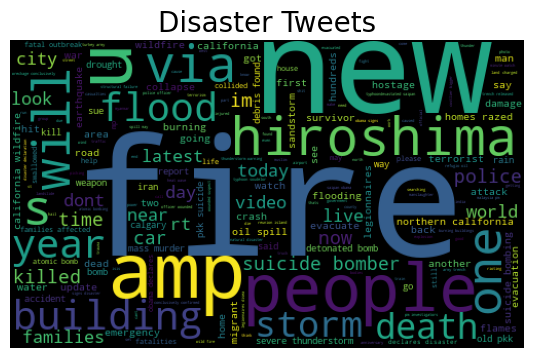

In [30]:
from wordcloud import WordCloud

#disaster tweet
disaster_tweet=train[train['target']==1]['text']
disaster_tweet.values[1]

fig, (ax1) = plt.subplots(1 , figsize=[10, 4])

wordcloud1=WordCloud(background_color='black',width=500,height=300).generate(" ".join(disaster_tweet))

ax1.imshow(wordcloud1)
ax1.axis('off')
ax1.set_title('Disaster Tweets',fontsize=20);

Ce qui précède affiche les mots les plus courants après le nettoyage du texte dans les données d'apprentissage. Les mots les plus fréquents sont : amp, new, one, people, time etc. .

# 4 Text Preprocessing and Vectorization


Dans l'apprentissage automatique, le prétraitement et la vectorisation du texte sont des étapes importantes dans la préparation des données textuelles pour l'analyse et la formation de modèles. Ces étapes impliquent la transformation de données textuelles brutes dans un format que les algorithmes d'apprentissage automatique peuvent comprendre et traiter efficacement.

Le prétraitement de texte fait référence à un ensemble de techniques utilisées pour nettoyer et transformer les données textuelles dans un format cohérent et normalisé. Cela implique généralement les étapes suivantes :

__Tokénisation__ : division du texte en mots individuels ou en unités linguistiques plus petites appelées jetons. 

__Minuscules__ : conversion de tout le texte en minuscules pour assurer la cohérence et éviter de traiter le même mot dans différentes casses comme des entités différentes.         

__Suppression des mots vides (stop-words)__ : suppression des mots courants qui n'ont pas de sens significatif, tels que les articles, les conjonctions et les prépositions.    

__Suppression de la ponctuation__ : suppression des signes de ponctuation du texte.   

__Stemming__ : réduction des mots à leur forme de base ou de racine pour consolider des variations similaires. La lemmatisation tient compte du contexte et produit des mots valides, tandis que la radicalisation utilise des règles simples pour tronquer les mots.           

__Suppression de nombres ou de caractères spéciaux__ : suppression des valeurs numériques ou des caractères spéciaux susceptibles de ne pas contribuer à l'analyse.           


La vectorisation, quant à elle, consiste à représenter les données textuelles dans un format numérique que les algorithmes d'apprentissage automatique peuvent traiter. Il convertit le texte en une représentation numérique structurée qui capture la signification sémantique sous-jacente du texte. Deux approches courantes pour vectoriser des données textuelles sont :       

__Bag-of-Words (BoW)__: Il représente chaque document comme une collection ou "sac" de mots, sans tenir compte de la grammaire et de l'ordre des mots. Le modèle BoW compte la fréquence de chaque mot dans un document et construit une représentation vectorielle creuse.             

__Terme Fréquence-Inverse Document Fréquence (TF-IDF)__ : Il calcule l'importance de chaque mot dans un document en considérant sa fréquence dans le document et inversement proportionnelle à sa fréquence sur l'ensemble du corpus. TF-IDF attribue des poids plus élevés aux mots qui sont plus informatifs et discriminants.


__NLTK (Natural Language Toolkit)__
Ce tokenizer divise un texte en une liste de phrases en utilisant un algorithme non supervisé pour créer un modèle pour les mots d'abréviation, les collocations et les mots qui commencent des phrases.


# 5 Tokenization

La tokenisation est souvent la première étape du prétraitement du texte. En décomposant le texte en jetons, nous pouvons appliquer diverses techniques de nettoyage de texte telles que la suppression de la ponctuation, la conversion du texte en minuscules et l'élimination des mots vides. Ces étapes de prétraitement permettent de réduire le bruit et de rendre les données textuelles plus faciles à gérer pour une analyse plus approfondie.

In [31]:
import pandas as pd
import nltk
from nltk.tokenize import WordPunctTokenizer
from nltk.util import ngrams

# Télécharger les ressources nécessaires pour la tokenisation
nltk.download('punkt')

# Charger le fichier CSV
train = pd.read_csv('train.csv')

# Créer une instance du tokenizer
tokenizer = WordPunctTokenizer()

# Appliquer la tokenisation pour chaque texte dans la colonne "text"
train['text'] = train['text'].apply(lambda x: tokenizer.tokenize(x))

# Créer les unigrams et les bigrams pour chaque texte
train['unigrams'] = train['text'].apply(lambda x: x)
train['bigrams'] = train['text'].apply(lambda x: list(ngrams(x, 2)))

# Afficher les unigrams et les bigrams pour les premières lignes du DataFrame
print(train[['unigrams', 'bigrams']])



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Wijdane\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                               unigrams  \
0     [Our, Deeds, are, the, Reason, of, this, #, ea...   
1      [Forest, fire, near, La, Ronge, Sask, ., Canada]   
2     [All, residents, asked, to, ', shelter, in, pl...   
3     [13, ,, 000, people, receive, #, wildfires, ev...   
4     [Just, got, sent, this, photo, from, Ruby, #, ...   
...                                                 ...   
7608  [Two, giant, cranes, holding, a, bridge, colla...   
7609  [@, aria_ahrary, @, TheTawniest, The, out, of,...   
7610  [M1, ., 94, [, 01, :, 04, UTC, ]?, 5km, S, of,...   
7611  [Police, investigating, after, an, e, -, bike,...   
7612  [The, Latest, :, More, Homes, Razed, by, North...   

                                                bigrams  
0     [(Our, Deeds), (Deeds, are), (are, the), (the,...  
1     [(Forest, fire), (fire, near), (near, La), (La...  
2     [(All, residents), (residents, asked), (asked,...  
3     [(13, ,), (,, 000), (000, people), (people, re...  
4

"unigrams" : Il s'agit d'une colonne qui contient des listes de mots individuels (unigrammes). Chaque liste représente les mots présents dans le texte correspondant de la colonne "text" avant d'être nettoyé. 

"bigrams" : Il s'agit d'une colonne qui contient des listes de paires de mots consécutifs (bigrammes). Chaque liste représente les paires de mots présentes dans le texte correspondant de la colonne "text" avant d'être nettoyé.

# 6 Suppression des StopWord 

Réduction du bruit : les mots vides tels que "the", "and", "is", "in", etc., sont très fréquents dans la plupart des textes en langage naturel. Cependant, ils manquent souvent de signification sémantique spécifique et sont utilisés pour faciliter la structure de la phrase ou l'exactitude grammaticale. La suppression des mots vides aide à réduire le bruit dans le texte et se concentre sur des mots plus significatifs et informatifs.

In [32]:
train

,id,keyword,location,text,target,unigrams,bigrams
0,1,NaN,NaN,"[Our, Deeds, are, the, Reason, of, this, #, ea...",1,"[Our, Deeds, are, the, Reason, of, this, #, ea...","[(Our, Deeds), (Deeds, are), (are, the), (the,..."
1,4,NaN,NaN,"[Forest, fire, near, La, Ronge, Sask, ., Canada]",1,"[Forest, fire, near, La, Ronge, Sask, ., Canada]","[(Forest, fire), (fire, near), (near, La), (La..."
2,5,NaN,NaN,"[All, residents, asked, to, ', shelter, in, pl...",1,"[All, residents, asked, to, ', shelter, in, pl...","[(All, residents), (residents, asked), (asked,..."
3,6,NaN,NaN,"[13, ,, 000, people, receive, #, wildfires, ev...",1,"[13, ,, 000, people, receive, #, wildfires, ev...","[(13, ,), (,, 000), (000, people), (people, re..."
4,7,NaN,NaN,"[Just, got, sent, this, photo, from, Ruby, #, ...",1,"[Just, got, sent, this, photo, from, Ruby, #, ...","[(Just, got), (got, sent), (sent, this), (this..."
...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,"[Two, giant, cranes, holding, a, bridge, colla...",1,"[Two, giant, cranes, holding, a, bridge, colla...","[(Two, giant), (giant, cranes), (cranes, holdi..."
7609,10870,NaN,NaN,"[@, aria_ahrary, @, TheTawniest, The, out, of,...",1,"[@, aria_ahrary, @, TheTawniest, The, out, of,...","[(@, aria_ahrary), (aria_ahrary, @), (@, TheTa..."
7610,10871,NaN,NaN,"[M1, ., 94, [, 01, :, 04, UTC, ]?, 5km, S, of,...",1,"[M1, ., 94, [, 01, :, 04, UTC, ]?, 5km, S, of,...","[(M1, .), (., 94), (94, [), ([, 01), (01, :), ..."
7611,10872,NaN,NaN,"[Police, investigating, after, an, e, -, bike,...",1,"[Police, investigating, after, an, e, -, bike,...","[(Police, investigating), (investigating, afte..."


__Suppression manuelle des mots vides des lignes__

In [33]:
stopwords = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours',
    'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself',
    'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which',
    'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be',
    'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an',
    'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by',
    'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before',
    'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over',
    'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why',
    'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such',
    'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can',
    'will', 'just', 'don', 'should', 'now']

# Fonction pour supprimer les mots vides d'une liste
def remove_stopwords(tokens):
    tokens = [token for token in tokens if token.lower() not in stopwords]
    return tokens

# Appliquer remove_stopwords à la colonne 'text'
train['text'] = train['text'].apply(lambda x: remove_stopwords(x))
# Imprimer le DataFrame
print(train.head())

   id keyword location                                               text  \
0   1     NaN      NaN  [Deeds, Reason, #, earthquake, May, ALLAH, For...   
1   4     NaN      NaN   [Forest, fire, near, La, Ronge, Sask, ., Canada]   
2   5     NaN      NaN  [residents, asked, ', shelter, place, ', notif...   
3   6     NaN      NaN  [13, ,, 000, people, receive, #, wildfires, ev...   
4   7     NaN      NaN  [got, sent, photo, Ruby, #, Alaska, smoke, #, ...   

   target                                           unigrams  \
0       1  [Our, Deeds, are, the, Reason, of, this, #, ea...   
1       1   [Forest, fire, near, La, Ronge, Sask, ., Canada]   
2       1  [All, residents, asked, to, ', shelter, in, pl...   
3       1  [13, ,, 000, people, receive, #, wildfires, ev...   
4       1  [Just, got, sent, this, photo, from, Ruby, #, ...   

                                             bigrams  
0  [(Our, Deeds), (Deeds, are), (are, the), (the,...  
1  [(Forest, fire), (fire, near), (near, L

# 7 Stemming

La radicalisation est un processus utilisé dans le traitement du langage naturel et l'exploration de texte pour réduire les mots à leur forme racine ou de base, connue sous le nom de racine. Le but principal du stemming est de réduire la dimensionnalité du vocabulaire et de regrouper les mots apparentés.

In [34]:
def remove_suffixes(word, suffixes):
    for i in suffixes:
        if word.endswith(i):
 #Le symbole - dans word  [:-len(suffix)]  est utilisé pour découper le mot et en supprimer le suffixe.
            stemmed_word = word[:-len(i)]
            return stemmed_word
    return word

def preprocess_text(text, suffixes):
    tokens = [token for token in text if token.lower() not in stopwords]  # Remove stopwords
    stemmed_tokens = [remove_suffixes(token, suffixes) for token in tokens]  # Remove suffixes
    preprocessed_text = ' '.join(stemmed_tokens)
    return preprocessed_text

# Define the stemming suffixes
stemming_suffixes = ['s', 'es', 'ed', 'ing', 'er', 'est', 'ly', 'able', 'er/or', 'ion']

# Apply preprocessing to the 'text' column in the 'train' DataFrame
train['text'] = train['text'].apply(lambda x: preprocess_text(x, stemming_suffixes))


# Print the DataFrame
print(train.head())

   id keyword location                                               text  \
0   1     NaN      NaN       Deed Reason # earthquake May ALLAH Forgive u   
1   4     NaN      NaN               For fire near La Ronge Sask . Canada   
2   5     NaN      NaN  resident ask ' shelt place ' notifi officer . ...   
3   6     NaN      NaN  13 , 000 people receive # wildfire evacuat ord...   
4   7     NaN      NaN  got sent photo Ruby # Alaska smoke # wildfire ...   

   target                                           unigrams  \
0       1  [Our, Deeds, are, the, Reason, of, this, #, ea...   
1       1   [Forest, fire, near, La, Ronge, Sask, ., Canada]   
2       1  [All, residents, asked, to, ', shelter, in, pl...   
3       1  [13, ,, 000, people, receive, #, wildfires, ev...   
4       1  [Just, got, sent, this, photo, from, Ruby, #, ...   

                                             bigrams  
0  [(Our, Deeds), (Deeds, are), (are, the), (the,...  
1  [(Forest, fire), (fire, near), (near, L

La radicalisation vise à réduire les mots à une forme de base en supprimant les suffixes ou les préfixes, tandis que la lemmatisation vise à déterminer la forme de base ou de dictionnaire d'un mot en tenant compte de la partie du discours et de la signification du mot. La radicalisation peut aboutir à des formes non linguistiques ou non dictionnaires, tandis que la lemmatisation garantit que le mot résultant est un mot valide dans la langue.

# 8 Feature extraction


Convertissez les données textuelles en caractéristiques numériques à l'aide d'une technique de vectorisation. Dans cet exemple, nous utiliserons la vectorisation TF-IDF.

TF-IDF (Term Frequency-Inverse Document Frequency) est une technique couramment utilisée dans le traitement du langage naturel (TAL) pour convertir des données textuelles en caractéristiques numériques. Le TfidfVectorizer est une classe de la bibliothèque scikit-learn qui implémente la vectorisation TF-IDF.

In [35]:
# Initialiser le vectoriseur TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# Créer une instance de TfidfVectorizer
vectorizer = CountVectorizer(stop_words=stopwords)

# Ajuster et transformer les données d'entraînement

vectors = vectorizer.fit_transform(train['text'])
# Transformer les données de test
vectors.shape

(7613, 19519)

In [36]:
# convertir une représentation creuse (sparse) en une représentation  (dense) d'une matrice .
X = vectors.toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [37]:
# extraire les valeurs de la colonne "target" et les stocke dans une variable appelée "Y".
Y = train['target'].values 
Y 

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

# 9 Divisez l'ensemble de données

Divisez l'ensemble de données en ensembles d'apprentissage et de test à l'aide de train_test_split de scikit-learn.

In [38]:
from sklearn.model_selection import train_test_split
# Diviser l'ensemble de données en ensembles d'entraînement et de test

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

__test_size=0.30__ : indique que 30% des données seront utilisées pour former l'ensemble de test, tandis que 70% des données seront utilisées pour former l'ensemble d'entraînement.  
__random_state=42__ : Cela fixe la graine aléatoire à 42, ce qui garantit que la division des données sera reproductible. Chaque fois que vous exécutez le code avec la même valeur de random_state, vous obtiendrez la même division des données.

# 10 Machine learning model

### __1. Logistic Regression__

In [39]:
from sklearn.linear_model import LogisticRegression
# Créer une instance du Logistic Regression
model1 = LogisticRegression()
model1.fit(X_train, y_train)
#  prédiction sur les données de test
y_pred1 = model1.predict(X_test)
accuracy = accuracy_score(y_test, y_pred1)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred1))


Accuracy: 0.8069176882661997
              precision    recall  f1-score   support

           0       0.80      0.88      0.84      1318
           1       0.82      0.70      0.75       966

    accuracy                           0.81      2284
   macro avg       0.81      0.79      0.80      2284
weighted avg       0.81      0.81      0.80      2284



#### confusion matrix


In [93]:
# prédire les probabilités des classes cibles pour les données de test
y_pred_proba =model1.predict_proba(X_test)
print('Predicted probability',y_pred_proba)

Predicted probability [[0.81685412 0.18314588]
 [0.6776358  0.3223642 ]
 [0.46631468 0.53368532]
 ...
 [0.00258531 0.99741469]
 [0.01274244 0.98725756]
 [0.42960596 0.57039404]]


Confusion matrix [[1150  168]
 [ 289  677]]


Text(50.722222222222214, 0.5, 'True')

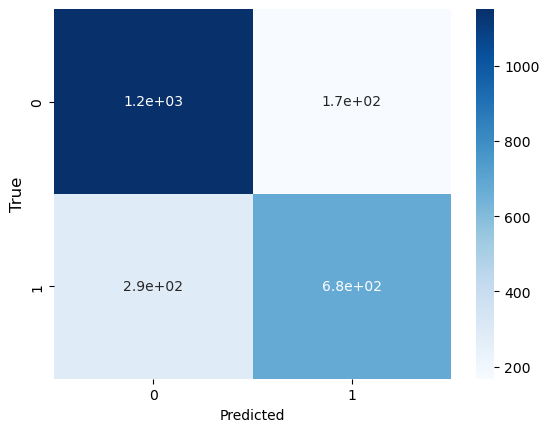

In [94]:
# calculer la matrice de confusion entre les valeurs cibles réelles (y_test) et les valeurs prédites (y_pred1).
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred1)
group_names = ['TN','FP','FN','TP']
print("Confusion matrix",cnf_matrix)
sns.heatmap(cnf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=10)
plt.ylabel('True', fontsize=12)

 L'expression "1,2e+03" est une notation scientifique ou exponentielle où "e+03" indique que le nombre est multiplié par 10 élevé à la puissance 3 (soit 1 000). Donc, "1,2e+03" est équivalent à "1,2 × 10^3" qui est égal à 1 200.

La matrice de confusion affichée est une matrice 2x2 qui représente les résultats de la classification binaire. Voici comment interpréter cette matrice :

Vrai Négatif (TN) : Il y a 1150 observations qui ont été correctement prédites comme étant de la classe négative.    
Faux Positif (FP) : Il y a 168 observations qui ont été incorrectement prédites comme étant de la classe positive, alors qu'elles appartiennent en réalité à la classe négative.     
Faux Négatif (FN) : Il y a 289 observations qui ont été incorrectement prédites comme étant de la classe négative, alors qu'elles appartiennent en réalité à la classe positive.    
Vrai Positif (TP) : Il y a 677 observations qui ont été correctement prédites comme étant de la classe positive.    